# Chapter 2: The Vector

The book's definition of a vector was surprising to me, as they define a vector as a function:

> For a finite set D and a field F, a D-vector over F is a function from D to F.

For example, the vector [3.14159,2.718281828,−1.0,2.0] can be thought of as the function:

0 -> 3.14159

1 -> 2.718281828

2 -> -1.0

3 -> 2.0

In python, we may represent a vector as a list or as a dictionary. Dictionaries allow us to implement **sparse vectors** by adopting the convetion that those entries that do not appear in the dictionary have their image be equal to zero.

A vector most of whose values are zero is called a sparse vector. If no more than k of the entries are nonzero, we say the vector is k-sparse. A k-sparse vector can be represented using space proportional to k.

In [1]:
import numpy as np
from plotting import plot, matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,6)

**Task 2.3.2**: In this task, we will represent a vector using a Python list. In Python, assign to the variable L a list of 2-element lists:

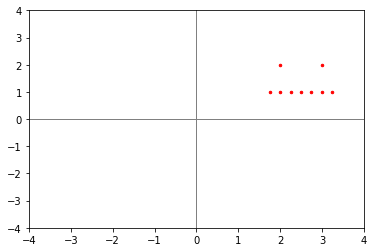

In [2]:
L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]]
plot(L, 4)

## Vector Addition

In [3]:
def add2(v,w):
    return [v[0]+w[0], v[1]+w[1]]

**Task 2.4.3*: Recall the list L defined in Task 2.3.2. Enter the procedure definition for 2-vector addition, and use a comprehension to plot the points obtained from L by adding [1, 2] to each:

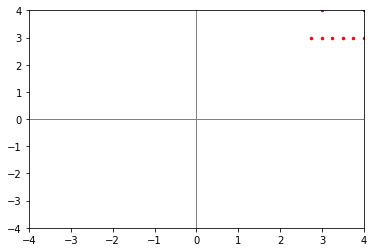

In [4]:
plot([add2(v, [1,2]) for v in L], 4)

**Quiz 2.4.4**: Suppose we represent n-vectors by n-element lists. Write a procedure addn to compute the sum of two vectors so represented

In [5]:
def addn(v, w):
    return [sum(x) for x in zip(v,w)]

In [6]:
addn([1, 2, 3], [4, 5, 6])

[5, 7, 9]

## Scalar Vector Multiplication
Multiplying a vector $v$ by a scalar $\alpha$ is defined as multiplying each entry of $v$ by $\alpha$

**Quiz 2.5.3**: Suppose we represent n-vectors by n-element lists. Write a procedure scalar_vector_mult(alpha, v) that multiplies the vector v by the scalar alpha.

In [7]:
def scalar_vector_mult(alpha, v):
    return [alpha * n for n in v]

**Task 2.5.4**: Plot the result of scaling the vectors in L by 0.5, then plot the result of scaling them by -0.5.

In [8]:
L_scaled_by_0_5 = [scalar_vector_mult(0.5, v) for v in L]
L_scaled_by_minus_0_5 = [scalar_vector_mult(-0.5, v) for v in L]

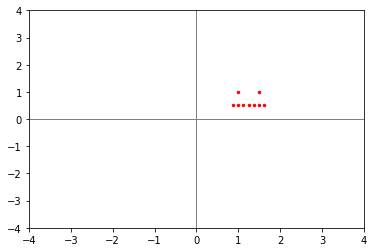

In [9]:
plot(L_scaled_by_0_5)

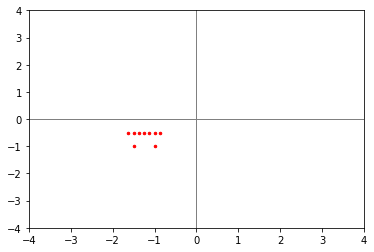

In [10]:
plot(L_scaled_by_minus_0_5)

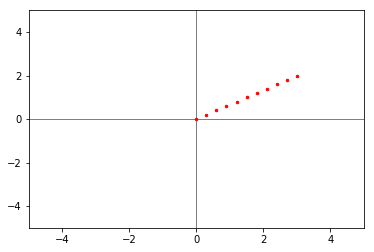

In [11]:
v = [3, 2]
plot([scalar_vector_mult(i/10, v) for i in range(11)], 5)

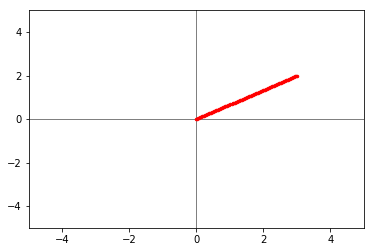

In [12]:
plot([scalar_vector_mult(i/100, v) for i in range(101)], 5)

## 2.6: Combining vector addition and scalar multiplication

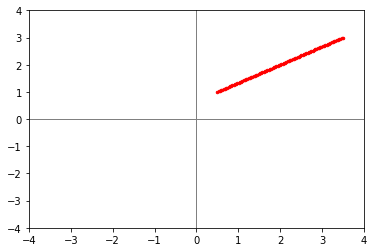

In [13]:
plot([add2(scalar_vector_mult(i/100., [3,2]), [0.5,1]) for i in range(101)], 4)

**Exericse 2.6.1** Given points u = [2,3] and v = [5,7] in R2, what is the point w such that the origin-to-w line segment can be translated to yield the u-to-v line segment? And what is the translation vector that is applied to both endpoints?

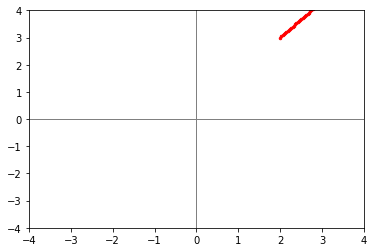

In [14]:
u = [2, 3]
v = [5, 7]
w = add2(v, scalar_vector_mult(-1, u))
transl = u
plot([add2(transl, scalar_vector_mult(i/100., w)) for i in range(101)])

**Exercise 2.6.2**: Given a pair of points, u = [1,4], v = [6,3] in R2, write a mathematical expressing giving the set of points making up the line segment between the points.

Answer:

$\{u + \alpha(v - u), \alpha \in R, 0 \leq \alpha \leq 1\}$

An expression of the form αu+βv where α,β ≥ 0 and α+β = 1 is called a convex combination of u and v. Which leads us to
the fact that the u-to-v line segment consists of the set of convex combinations of u and v.

**Task 2.6.9**: Write a python procedure segment(pt1, pt2) that, given points represented as 2-element lists, returns a list of a hundred points spaced evenly along the line segment whose endpoints are the two points
Plot the hundred points resulting when pt1 = [3.5, 3] and pt2 = [0.5, 1]

In [15]:
def segment(pt1, pt2):
    return [add2(scalar_vector_mult(i/100, pt1), scalar_vector_mult(1-(i/100), pt2)) for i in range(101)]

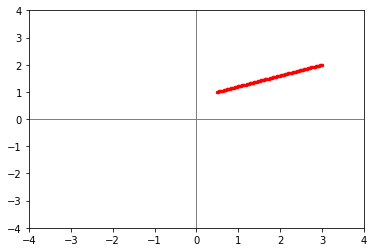

In [16]:
plot(segment([3,2], [0.5, 1]))

The difference between convex and affine combinations it that, in a convex combination, the coefficients $\alpha$, $\beta$, ... have to be positive. In affine combinations there is no such restrition. In the 2D case, a convex combination between the points is a line segment, but the affine combination is a line through both points, as a coefficient can exceed the 1 bound and be i.e. 3, because there will be

At this point the book introduces a class **Vec** that will represent the domain of a function as a set and the function itself as a dictionary.

## Dictionary-based representations of vectors

In [17]:
class Vec:
    def __init__(self, labels, function):
        self.D = labels
        self.f = function

In [18]:
v = Vec({'A','B','C'}, {'A':1})

**Quiz 2.7.1**: Write a procedure zero_vec(D) with the following spec:

- input: a set D
- output: an instance of Vec representing a D-vector all of whose entries have value zero

In [19]:
def zero_vec(D):
    return Vec(D, {}) # Exploiting the sparse representation

In [20]:
def setitem(v, d, val): v.f[d] = val

In [21]:
setitem(v, 'B', 2.)

**Quiz 2.7.2**: Write a procedure getitem(v, d) with the following spec: 

- input: an instance v of Vec, and an element d of the set v.D
- output: the value of entry d of v

Write your procedure in a way that takes into account the sparse-representation convention. Hint: the procedure can be written in one-line using a conditional expression (Section 0.5.3). You can use your procedure to obtain the 'A' entry of the vector v we defined earlier:

getitem(v, 'A')
1

In [22]:
def getitem(v, d):
    return v.f.get(d, 0)

In [23]:
getitem(v, 'A')

1

In [24]:
getitem(v, 'Z')

0

**Quiz 2.7.3**: Write a procedure scalar_mul(v, alpha) with the following spec:

- input: an instance of Vec and a scalar alpha
- output: a new instance of Vec that represents the scalar-vector product alpha times v.
    
There is a nice way to ensure that the output vector is as sparse as the input vector, but you are not required to ensure this. You can use getitem(v, d) in your procedure but are not required to. Be careful to ensure that your procedure does not modify the vector it is passed as argument; it creates a new instance of Vec. However, the new instance should point to the same set D as the old instance.

In [25]:
def scalar_mul(v, alpha):
    return Vec([d for d in v.D], {d: value*alpha for d,value in v.f.items()})

In [26]:
scalar_mul(v, 2).f

{'A': 2, 'B': 4.0}

**Quiz 2.7.4**: Write a procedure add(u, v) with the following spec: 

- input: instances u and v of Vec
- output: an instance of Vec that is the vector sum of u and v

Here’s an example of the procedure being used:
u = Vec(v.D, {'A':5., 'C':10.})
add(u,v)
<__main__.Vec object at 0x10058cd10>
add(u,v).f
{'A': 6.0, 'C': 10.0, 'B': 2.0}
You are encouraged to use getitem(v, d) in order to tolerate sparse representations. You are encouraged not to try to make the output vector sparse. Finally, you are encouraged to use a dictionary comprehension to define the dictionary for the new instance of Vec.

In [27]:
def add(u, v):
    return Vec(u.D | v.D, { d: getitem(u, d) + getitem(v, d) for d in u.D | v.D})

In [28]:
u = Vec(v.D, {'A': 5., 'C': 10.})

In [29]:
add(u, v).f

{'A': 6.0, 'B': 2.0, 'C': 10.0}

**Quiz 2.7.5**: Write a Python procedure neg(v) with the following spec: 

- input: an instance v of Vec
- output: a dictionary representing the negative of v

Here’s an example of the procedure being used:
neg(v).f
{'A': -1.0, 'C': 0, 'B': -2.0}
There are two ways to write the procedure. One is by explicitly computing the .f field of the output vector using a comprehension. The other way is by using an appropriate call to the procedure scalar_mul you defined in Quiz 2.7.3.

In [30]:
def neg(v):
    return scalar_mul(v, -1)

In [31]:
neg(v).f

{'A': -1, 'B': -2.0}

**Quiz 2.9.4**: Write a procedure list_dot(u, v) with the following spec: 

- input: equal-length lists u and v of field elements
- output: the dot-product of u and v interpreted as vectors

Use the sum(·) procedure together with a list comprehension.

In [32]:
def list_dot(u, v):
    return sum([a*b for a, b in zip(u, v)])

**Quiz 2.9.13**: Suppose the haystack is [1, -1, 1, 1, 1, -1, 1, 1, 1] and the needle is [1, -1, 1, 1, -1, 1]. Compute the dot-products and indicate which position achieves the best match.

In [33]:
haystack = [1, -1, 1, 1, 1, -1, 1, 1, 1]
needle =   [1, -1, 1, 1, -1, 1]
[list_dot(haystack[n:n+len(needle)], needle) for n in range(len(haystack) - len(needle) + 1)]

[2, 2, 0, 0]

**Quiz 2.9.14**: This method of searching is not universally applicable. Say we wanted to locate the short clip [1, 2, 3] in the longer segment [1, 2, 3, 4, 5, 6]. What would the dot-product method select as the best match?

Answer: It would select [4, 5, 6] as the best match

**Quiz 2.9.15**: Write a procedure dot_product_list(needle,haystack) with the following spec:

- input: a short list needle and a long list haystack, both containing numbers
- output: a list of length len(haystack)-len(needle) such that entry i of the output list equals the dot-product of the needle with the equal-length sublist of haystack starting at position i

In [34]:
def dot_product_list(needle, haystack):
    return [list_dot(haystack[n:n+len(needle)], needle) for n in range(len(haystack) - len(needle) + 1)]

In [35]:
dot_product_list([1, -1, 1, 1, -1, 1], [1, -1, 1, 1, 1, -1, 1, 1, 1])

[2, 2, 0, 0]

**Problem 2.9.29**: Eve knows the following challenges and responses:
challenge response

- 110011 0 
- 101010 0 
- 111011 1 
- 001100 1

Show how she can derive the right responses to the challenges 011101 and 000100:

Consider that 101010 + 111011 + 001100 = 011101, then the correct response to the challenge is the sum of the responses that correspond to each operand, i.e. 0 + 1 + 1 = 0

Consider that 110011 + 111011 + 001100 = 000100, then the correct response to the challenge is the sum of the responses that correspond to each operand, i.e. 0 + 1 + 1 = 0

**Quiz 2.10.1**: Write a procedure list2vec(L) with the following spec:

- input: a list L of field elements
- output: an instance v of Vec with domain {0, 1, 2, . . . , len(L) − 1} such that v[i] = L[i] for each integer i in the domain

In [36]:
def list2vec(L):
    len_L = len(L)
    return Vec(set(range(len_L)), { i:L[i] for i in range(len_L)})

**Quiz 2.11.2**: Using the above technique, solve the following system by hand:

- 2x1 + 3x2 − 4x3 = 10
-       1x2 + 2x3 = 3
-             5x3 = 15

Answer:

- x3 = 15/5 = 3
- x2 = 3 - 2(3) = 3 - 6 = -3
- x1 = (10 - 3(-3) + 4(3))/2 = 31/2

**Exercise 2.11.3**: Solve the following system:

\begin{align}
1x_1 − 3x_2 − 2x_3 &= 7 \\
2x_2 + 4x_3 &= 4 \\
−10x_3 &= 12 \\
\end{align}

Answer:

\begin{align}
x_3 = \frac{12}{-10} = \frac{-6}{5} \\
x_2 = \frac{4 - 4\frac{-6}{5}}{2} = \frac{4 + \frac{24}{5}}{2} = \frac{22}{5} \\
x_1 = 7 - 2 \frac{-6}{5} - 3 \frac{22}{5} = \frac{89}{5}
\end{align}


Write a procedure triangular_solve_n(rowlist, b) with the following spec:

- input: for some integer n, a triangular system consisting of a list rowlist of n-vectors, and a length-n list b of numbers
- output: a vector xˆ such that, for i = 0, 1, . . . , n − 1, the dot-product of rowlist[i] with xˆ equals b[i]


In [37]:
from vec import Vec

In [38]:
def triangular_solve_n(rowlist, b):
    D = rowlist[0].D
    n = len(D)
    assert D == set(range(n))
    x = zero_vec(D)
    for i in reversed(range(n)):
        x[i] = (b[i] - rowlist[i] * x)/rowlist[i][i]
    return x

In [39]:
triangular_solve_n([list2vec([1, -3, -2]), list2vec([0, 2, 4]), list2vec([0, 0, -10])], list2vec([7, 4, 12]))

Vec({0, 1, 2},{2: -1.2, 1: 4.4, 0: 17.8})

## Lab: Comparing voting records using dot product

In [41]:
f = open('voting_record_dump109.txt')
mylist = list(f)

**Task 2.12.1**: Write a procedure create voting dict(strlist) that, given a list of strings (voting records from the source file), returns a dictionary that maps the last name of a senator to a list of numbers representing that senator’s voting record. You will need to use the built-in procedure int(·) to convert a string representation of an integer (e.g. ‘1’) to the actual integer (e.g. 1).

In [50]:
def create_voting_dict(strlist):
    voting_dict = {}
    for row in strlist:
        tokens = row.split()
        voting_dict[tokens[0]] = list(map(int, tokens[3:]))
    return voting_dict

In [59]:
voting_dict = create_voting_dict(mylist)

**Task 2.12.2**: Write a procedure policy compare(sen a, sen b, voting dict) that, given two names of senators and a dictionary mapping senator names to lists representing voting records, returns the dot-product representing the degree of similarity between two senators’ voting policies.

In [68]:
def policy_compare(sen_a, sen_b, voting_dict):
    return list_dot(voting_dict[sen_a], voting_dict[sen_b])

**Task 2.12.3**: Write a procedure most similar(sen, voting dict) that, given the name of a senator and a dictionary mapping senator names to lists representing voting records, returns the name of the senator whose political mindset is most like the input senator (excluding, of course, the input senator him/herself).

In [69]:
def most_similar(sen, voting_dict):
    most_similar_senator = None
    most_similar_score = float('-Inf')
    for other_senator_name in voting_dict.keys():
        if other_senator_name == sen: continue
        similarity_score = policy_compare(sen, other_senator_name, voting_dict)
        if similarity_score > most_similar_score:
            most_similar_senator = other_senator_name
            most_similar_score = similarity_score
    return most_similar_senator

**Task 2.12.4**: Write a very similar procedure least similar(sen, voting dict) that returns the name of the senator whose voting record agrees the least with the senator whose name is sen.

In [74]:
def least_similar(sen, voting_dict):
    least_similar_senator = None
    least_similar_score = float('Inf')
    for other_senator_name in voting_dict.keys():
        if other_senator_name == sen: continue
        similarity_score = policy_compare(sen, other_senator_name, voting_dict)
        if similarity_score < least_similar_score:
            least_similar_senator = other_senator_name
            least_similar_score = similarity_score
    return least_similar_senator

**Task 2.12.5**: Use these procedures to figure out which senator is most like Rhode Island legend Lincoln Chafee. Then use these procedures to see who disagrees most with Pennsylvania’s Rick Santorum. Give their names.

In [83]:
print('Most similar to Chafee is: ' + most_similar('Chafee', voting_dict))
print('Least similar to Santorum is: ' + least_similar('Santorum', voting_dict))

Most similar to Chafee is: Jeffords
Least similar to Santorum is: Feingold


In [79]:
print(voting_dict['Chafee'][:25])
print(voting_dict['Jeffords'][:25])

[1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [80]:
print(voting_dict['Santorum'][:25])
print(voting_dict['Feingold'][:25])

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1]
[-1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1]


**Task 2.12.7**: Write a procedure find average similarity(sen, sen set, voting dict) that, given the name sen of a senator, compares that senator’s voting record to the voting records of all senators whose names are in sen set, computing a dot-product for each, and then returns the average dot-product.
Use your procedure to compute which senator has the greatest average similarity with the set of Democrats (you can extract this set from the input file).

In [94]:
def find_average_similarity(sen, sen_set, voting_dict):
    return sum(map(lambda other_sen: policy_compare(sen, other_sen, voting_dict), sen_set)) / len(sen_set)

In [95]:
democrat_senators = []
for row in mylist:
    if row.split()[1] == 'D':
        democrat_senators.append(row.split()[0])

In [96]:
sen_most_similar_to_democrats = None
sen_most_similar_to_democrats_score = float('-Inf')
for sen in voting_dict.keys():
    average_similarity_to_dems = find_average_similarity(sen, democrat_senators, voting_dict)
    if average_similarity_to_dems > sen_most_similar_to_democrats_score:
        sen_most_similar_to_democrats = sen
        sen_most_similar_to_democrats_socre = average_similarity_to_dems
        
print(sen_most_similar_to_democrats)

Wyden


**Task 2.12.8**: Write a procedure find average record(sen set, voting dict) that, given a set of names of senators, finds the average voting record. That is, perform vector addition on the lists representing their voting records, and then divide the sum by the number of vectors. The result should be a vector.
Use this procedure to compute the average voting record for the set of Democrats, and assign the result to the variable average Democrat record. Next find which senator’s voting record is most similar to the average Democrat voting record. Did you get the same result as in Task 2.12.7? Can you explain?

In [103]:
def find_average_record(sen_set, voting_dict):
    running_sum = addn(voting_dict[sen_set[0]], voting_dict[sen_set[1]])
    for sen in sen_set[2:]:
        running_sum = addn(running_sum, voting_dict[sen])
    return scalar_vector_mult(1.0/len(sen_set), running_sum)

In [105]:
average_democrat_record = find_average_record(democrat_senators, voting_dict)

In [107]:
voting_dict_ext = voting_dict.copy()
voting_dict_ext['average_democrat_record'] = average_democrat_record
print(most_similar('average_democrat_record', voting_dict_ext))

Biden
